### FIGURE

In [13]:
%matplotlib inline
import matplotlib.pylab as plt
from random import randrange
from py_pcha.PCHA import PCHA
import numpy as np

In [14]:
def validate(point, poly):
    """Validate if point is inside polygon.

    Algorithm from http://www.ariel.com.au/a/python-point-int-poly.html
    
    Parameters
    ----------
    point : (float, float)
    poly : list of 2-tuples
        List of cornerpoints that constitute the polygon, ordered convex clockwise.
    
    Returns
    -------
    inside : bool
        If True, point is inside campus, else False.
    """
    x, y = point

    n = len(poly)
    inside = False

    p1x,p1y = poly[0]
    for i in range(n+1):
        p2x,p2y = poly[i % n]
        if y > min(p1y,p2y):
            if y <= max(p1y,p2y):
                if x <= max(p1x,p2x):
                    if p1y != p2y:
                        xints = (y-p1y)*(p2x-p1x)/(p2y-p1y)+p1x
                    if p1x == p2x or x <= xints:
                        inside = not inside
        p1x,p1y = p2x,p2y

    return inside

In [15]:
poly1 = [(0, 1.5), (1.5, 2), (1, 0)]
poly2 = [(0, 1.5), (1.5, 2), (2, 1), (1, 0)]

def sample_points_in_polygon(poly, N, noise_level):
    x = [i[0] for i in poly]
    y = [i[1] for i in poly]

    max_x, min_x = max(x), min(x)
    max_y, min_y = max(y), min(y)

    points = []
    while len(points) < N:
        point_x = randrange(min_x * 1000, max_x * 1000) * 2.0 / ((max_x - min_x) * 1000)
        point_y = randrange(min_y * 1000, max_y * 1000) * 2.0 / ((max_y - min_y) * 1000)
        if validate((point_x, point_y), poly):
            if noise_level > 0:
                noise_x = randrange(min_x * 1000, max_x * 1000) * 2.0 / ((max_x - min_x) * 1000) * noise_level
                noise_y = randrange(min_y * 1000, max_y * 1000) * 2.0 / ((max_y - min_y) * 1000) * noise_level
                points.append((point_x + noise_x, point_y + noise_y))
            else:
                points.append((point_x, point_y))
    return points

points1 = sample_points_in_polygon(poly1, 500, 0.5)
points2 = sample_points_in_polygon(poly2, 500, 0.5)

In [16]:
X1 = np.array(points1).T
X2 = np.array(points2).T
A1, S1, C1, _, _= PCHA(X1, 3, delta=0.4)
A2, S2, C2, _, _= PCHA(X2, 4, delta=0.4)

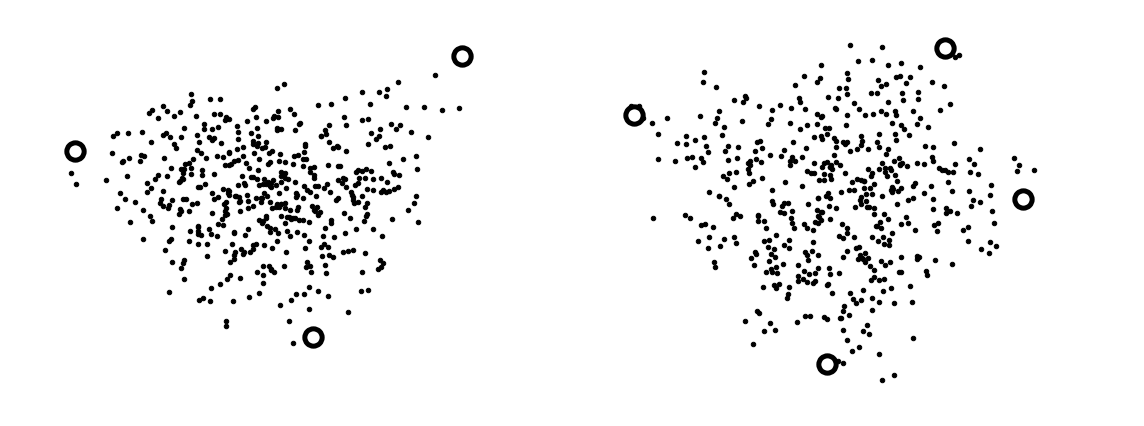

In [191]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.scatter([i[0] for i in points1], [i[1] for i in points1], c="k")
plt.scatter(A1[0, :], A1[1, :], c="w", s=300, lw=5)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.scatter([i[0] for i in points2], [i[1] for i in points2], c="k")
plt.scatter(A2[0, :], A2[1, :], c="w", s=300, lw=5)
plt.axis('off')

plt.tight_layout()
plt.savefig("/Users/ulfaslak/Dropbox/school/sem12/MScProject/Academic/master_thesis/figures/AA.pdf")

### FIGURE